In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings
import re
import spacy
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')


–û–ë–©–ò–ô –í–´–í–û–î –ü–û –ê–ù–ê–õ–ò–ó–£ –í –ö–û–ù–¶–ï

In [ ]:
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')


–ú–æ–¥–µ–ª—å spaCy 'ru_core_news_sm' –Ω–µ –Ω–∞–π–¥–µ–Ω–∞.


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df=pd.read_excel('/content/reviews.xlsx')

In [ ]:
df.head()

–û—Ü–µ–Ω–∫–∞                                       –¢–µ–∫—Å—Ç –æ—Ç–∑—ã–≤–∞  \
0       2                                                NaN   
1       1                                                NaN   
2       1  –ü–æ—Å–ª–µ 3—Ö –º–µ—Å—è—Ü–µ–≤ —ç–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏–∏ –ø–æ—Ç–µ–∫–ª–∞ –≤–æ–¥–∞ –ø–æ–º...   
3       1                                   –ù–µ —Å–æ–≤–µ—Ç—É—é –±—Ä–∞—Ç—å   
4       1                                                NaN   

                     –ü–ª—é—Å—ã  \
0  –û–±—ã—á–Ω–∞—è,—Ç–æ–ª—å–∫–æ —Ñ–∏—Ä–º–∞ –æ–∫   
1                      NaN   
2                      NaN   
3                   –ù–∏—á–µ–≥–æ   
4                      NaN   

  –ú–∏–Ω—É—Å—ã –≤ —Ç–æ–º , —á—Ç–æ –∫—É–ø–∏–ª–∏ –ø—Ä–∏–µ—Ö–∞–ª–∏ –¥–æ–º–æ–π —Ö–æ—Ç–µ–ª–∏ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å —Å–≤–∞—Ç—å –∫–æ—Ñ–µ , –∞ –æ–Ω–∞ –Ω–µ —Ä–∞–±–æ—Ç–∞–µ—Ç . –î–æ–º–∞ –æ–∑–Ω–∞–∫–æ–º–∏–ª–∞—Å—å —Å –∏–Ω—Å—Ç—Ä—É–∫—Ü–∏–µ–π —Å—Ç–∞–ª–∞ –≤–∫–ª—é—á–∞—Ç—å –≤ —Ä–∞–∑–µ—Ç–∫—É , –∞ –æ–Ω–∞ –≤–æ–æ–±—â–µ –Ω–µ –Ω–µ –≤–∫–ª—é—á–∞–µ—Ç—Å—è –Ω–µ –æ–¥–Ω–∞ –∫–Ω–æ–ø–∫–∞, –æ–¥–∏–Ω —Ä–∞–∑ –∑–∞–≥–æ—Ä–µ–ª–∞—Å—å –∫–Ω–æ–ø–∫–∞ –ø–∞—Ä –∏ —Ç–µ–ø–µ—Ä—å –¥–∞–∂–µ –æ–Ω–∞ –Ω–µ —Ä–∞–±–æ—Ç–∞–µ—Ç . –ö–∞–∫ —Ç–µ–ø–µ—Ä—å –æ—Ñ–æ—Ä–º–∏—Ç—å –≤–æ–∑–≤—Ä–∞—Ç –¥–µ–Ω–µ–∂–Ω—ã—Ö —Å—Ä–µ–¥—Å—Ç –∑–∞—Ç–∞–∫—É—é —á—É–¥–æ –º–∞—à–∏–Ω—É ?  \
0                             –í–∫–ª—é—á–∞—Ç–µ–ª–∏ –Ω–µ –Ω–∞–¥–µ–∂–Ω—ã–µ                                                                                                                                                                                                                                                                                       
1                                                NaN                                                                                                                                                                                                                                                                                       
2  –ø–æ—Ç–µ–∫–ª–∞ –≤–æ–¥–∞ –ø–æ–º–∏–º–æ —Ä–µ–∑–µ—Ä–≤—É–∞—Ä–∞ —Å –∫–æ—Ñ–µ, –≤–æ–¥–∞ –Ω–∞...                                                                                                                                                                                                                                                                                       
3  –ö–æ–ª–æ–Ω–∫–∞ –Ω–µ –ø–æ–¥–∫–ª—é—á–∞–µ—Ç—Å—è –≤–æ–æ–±—â–µ, –Ω–∞—Ö–æ–¥–∏—Ç , –∏–¥—ë—Ç...                                                                                                                                                                                                                                                                                       
4                              –ü—Ä–∏—Å–ª–∞–ª–∏ –¥—Ä—É–≥–æ–π —Ç–æ–≤–∞—Ä                                                                                                                                                                                                                                                                                       

          –î–∞—Ç–∞ —Å–æ–∑–¥–∞–Ω–∏—è                                  –ù–∞–∑–≤–∞–Ω–∏–µ –ø—Ä–æ–¥—É–∫—Ç–∞  \
0  2025-03-14T09:40:33Z                             –ì–∞–∑–æ–≤–∞—è –ø–ª–∏—Ç–∞ GG5A10WH   
1  2025-03-14T07:17:50Z   –ü–∞—Ä–æ–≤–æ–π —É—Ç—é–≥ –¥–ª—è –≥–ª–∞–∂–∫–∏ Virtuo FV1712E0, 2000 –í—Ç   
2  2025-03-14T05:19:12Z            –ö–æ—Ñ–µ–≤–∞—Ä–∫–∞ –∫–∞–ø–µ–ª—å–Ω–∞—è —Å –∫–æ—Ñ–µ–º–æ–ª–∫–æ–π KT-705   
3  2025-03-14T03:22:04Z     –£–º–Ω–∞—è –∫–æ–ª–æ–Ω–∫–∞ –ö–∞–ø—Å—É–ª–∞ –ù–µ–æ —Å –ú–∞—Ä—É—Å–µ–π, –æ—Ä–∞–Ω–∂–µ–≤—ã–π   
4  2025-03-13T20:18:40Z  –ö–æ—Ñ–µ–º–∞—à–∏–Ω–∞ –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∞—è PrimaDonna Soul ECAM...   

  –ê—Ä—Ç–∏–∫—É–ª –ø—Ä–æ–¥—É–∫—Ç–∞ —É –ø—Ä–æ–¥–∞–≤—Ü–∞  \
0                 –°–ü-00060946   
1                 –°–ü-00037674   
2                 –°–ü-00019266   
3                 –°–ü-00063652   
4                 –°–ü-00038895   

                                           –ü—Ä–æ–¥–∞–≤–µ—Ü –ù–∞–∑–≤–∞–Ω–∏–µ –±—Ä–µ–Ω–¥–∞  \
0  –û–ë–©–ï–°–¢–í

–ü–æ–≤—Ä–µ–∂–¥–µ–Ω–æ –Ω–∞–∑–≤–∞–Ω–∏–µ 3 –∫–æ–ª–æ–Ω–∫–∏, –ø–æ—ç—Ç–æ–º—É –ø–µ—Ä–µ–∏–º–µ–Ω–æ–≤—ã–≤–∞–µ–º

In [ ]:
df=df.rename(columns={'–ú–∏–Ω—É—Å—ã –≤ —Ç–æ–º , —á—Ç–æ –∫—É–ø–∏–ª–∏ –ø—Ä–∏–µ—Ö–∞–ª–∏ –¥–æ–º–æ–π —Ö–æ—Ç–µ–ª–∏ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å —Å–≤–∞—Ç—å –∫–æ—Ñ–µ , –∞ –æ–Ω–∞ –Ω–µ —Ä–∞–±–æ—Ç–∞–µ—Ç . –î–æ–º–∞ –æ–∑–Ω–∞–∫–æ–º–∏–ª–∞—Å—å —Å –∏–Ω—Å—Ç—Ä—É–∫—Ü–∏–µ–π —Å—Ç–∞–ª–∞ –≤–∫–ª—é—á–∞—Ç—å –≤ —Ä–∞–∑–µ—Ç–∫—É , –∞ –æ–Ω–∞ –≤–æ–æ–±—â–µ –Ω–µ –Ω–µ –≤–∫–ª—é—á–∞–µ—Ç—Å—è –Ω–µ –æ–¥–Ω–∞ –∫–Ω–æ–ø–∫–∞, –æ–¥–∏–Ω —Ä–∞–∑ –∑–∞–≥–æ—Ä–µ–ª–∞—Å—å –∫–Ω–æ–ø–∫–∞ –ø–∞—Ä –∏ —Ç–µ–ø–µ—Ä—å –¥–∞–∂–µ –æ–Ω–∞ –Ω–µ —Ä–∞–±–æ—Ç–∞–µ—Ç . –ö–∞–∫ —Ç–µ–ø–µ—Ä—å –æ—Ñ–æ—Ä–º–∏—Ç—å –≤–æ–∑–≤—Ä–∞—Ç –¥–µ–Ω–µ–∂–Ω—ã—Ö —Å—Ä–µ–¥—Å—Ç –∑–∞—Ç–∞–∫—É—é —á—É–¥–æ –º–∞—à–∏–Ω—É ?':'–ú–∏–Ω—É—Å—ã'})
df.head()

–û—Ü–µ–Ω–∫–∞                                       –¢–µ–∫—Å—Ç –æ—Ç–∑—ã–≤–∞  \
0       2                                                NaN   
1       1                                                NaN   
2       1  –ü–æ—Å–ª–µ 3—Ö –º–µ—Å—è—Ü–µ–≤ —ç–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏–∏ –ø–æ—Ç–µ–∫–ª–∞ –≤–æ–¥–∞ –ø–æ–º...   
3       1                                   –ù–µ —Å–æ–≤–µ—Ç—É—é –±—Ä–∞—Ç—å   
4       1                                                NaN   

                     –ü–ª—é—Å—ã                                             –ú–∏–Ω—É—Å—ã  \
0  –û–±—ã—á–Ω–∞—è,—Ç–æ–ª—å–∫–æ —Ñ–∏—Ä–º–∞ –æ–∫                             –í–∫–ª—é—á–∞—Ç–µ–ª–∏ –Ω–µ –Ω–∞–¥–µ–∂–Ω—ã–µ   
1                      NaN                                                NaN   
2                      NaN  –ø–æ—Ç–µ–∫–ª–∞ –≤–æ–¥–∞ –ø–æ–º–∏–º–æ —Ä–µ–∑–µ—Ä–≤—É–∞—Ä–∞ —Å –∫–æ—Ñ–µ, –≤–æ–¥–∞ –Ω–∞...   
3                   –ù–∏—á–µ–≥–æ  –ö–æ–ª–æ–Ω–∫–∞ –Ω–µ –ø–æ–¥–∫–ª—é—á–∞–µ—Ç—Å—è –≤–æ–æ–±—â–µ, –Ω–∞—Ö–æ–¥–∏—Ç , –∏–¥—ë—Ç...   
4                      NaN                              –ü—Ä–∏—Å–ª–∞–ª–∏ –¥—Ä—É–≥–æ–π —Ç–æ–≤–∞—Ä   

          –î–∞—Ç–∞ —Å–æ–∑–¥–∞–Ω–∏—è                                  –ù–∞–∑–≤–∞–Ω–∏–µ –ø—Ä–æ–¥—É–∫—Ç–∞  \
0  2025-03-14T09:40:33Z                             –ì–∞–∑–æ–≤–∞—è –ø–ª–∏—Ç–∞ GG5A10WH   
1  2025-03-14T07:17:50Z   –ü–∞—Ä–æ–≤–æ–π —É—Ç—é–≥ –¥–ª—è –≥–ª–∞–∂–∫–∏ Virtuo FV1712E0, 2000 –í—Ç   
2  2025-03-14T05:19:12Z            –ö–æ—Ñ–µ–≤–∞—Ä–∫–∞ –∫–∞–ø–µ–ª—å–Ω–∞—è —Å –∫–æ—Ñ–µ–º–æ–ª–∫–æ–π KT-705   
3  2025-03-14T03:22:04Z     –£–º–Ω–∞—è –∫–æ–ª–æ–Ω–∫–∞ –ö–∞–ø—Å—É–ª–∞ –ù–µ–æ —Å –ú–∞—Ä—É—Å–µ–π, –æ—Ä–∞–Ω–∂–µ–≤—ã–π   
4  2025-03-13T20:18:40Z  –ö–æ—Ñ–µ–º–∞—à–∏–Ω–∞ –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∞—è PrimaDonna Soul ECAM...   

  –ê—Ä—Ç–∏–∫—É–ª –ø—Ä–æ–¥—É–∫—Ç–∞ —É –ø—Ä–æ–¥–∞–≤—Ü–∞  \
0                 –°–ü-00060946   
1                 –°–ü-00037674   
2                 –°–ü-00019266   
3                 –°–ü-00063652   
4                 –°–ü-00038895   

                                           –ü—Ä–æ–¥–∞–≤–µ—Ü –ù–∞–∑–≤–∞–Ω–∏–µ –±—Ä–µ–Ω–¥–∞  \
0  –û–ë–©–ï–°–¢–í–û –° –û–ì–†–ê–ù–ò–ß–ï–ù–ù–û–ô –û–¢–í–ï–¢–°–¢–í–ï–ù–ù–û–°–¢–¨–Æ "–ì–ò–ü–ï–†"         Gorenje   
1  –û–ë–©–ï–°–¢–í–û –° –û–ì–†–ê–ù–ò–ß–ï–ù–ù–û–ô –û–¢–í–ï–¢–°–¢–í–ï–ù–ù–û–°–¢–¨–Æ "–ì–ò–ü–ï–†"           Tefal   
2  –û–ë–©–ï–°–¢–í–û –° –û–ì–†–ê–ù–ò–ß–ï–ù–ù–û–ô –û–¢–í–ï–¢–°–¢–í–ï–ù–ù–û–°–¢–¨–Æ "–ì–ò–ü–ï–†"         Kitfort   
3  –û–ë–©–ï–°–¢–í–û –° –û–ì–†–ê–ù–ò–ß–ï–ù–ù–û–ô –û–¢–í–ï–¢–°–¢–í–ï–ù–ù–û–°–¢–¨–Æ "–ì–ò–ü–ï–†"              VK   
4  –û–ë–©–ï–°–¢–í–û –° –û–ì–†–ê–ù–ò–ß–ï–ù–ù–û–ô –û–¢–í–ï–¢–°–¢–í–ï–ù–ù–û–°–¢–¨–Æ "–ì–ò–ü–ï–†"        Delonghi   

            –ó–∞–≥–æ–ª–æ–≤–æ–∫ –æ—Ç–∑—ã–≤–∞  
0           –ü–ª–∏—Ç—ã —Å –¥—É—Ö–æ–≤–∫–æ–π  
1                      –£—Ç—é–≥–∏  
2                  –ö–æ—Ñ–µ–≤–∞—Ä–∫–∏  
3  –ú—É–∑—ã–∫–∞–ª—å–Ω—ã–µ –ø—Ä–æ–∏–≥—Ä—ã–≤–∞—Ç–µ–ª–∏  
4                 –ö–æ—Ñ–µ–º–∞—à–∏–Ω—ã

–û—Ç—Ñ–∏–ª—å—Ç—Ä—É–µ–º –∏ –æ—Å—Ç–∞–≤–∏–º —Ç–æ–ª—å–∫–æ –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã–µ –æ—Ç–∑—ã–≤—ã (1-2 –∑–≤–µ–∑–¥—ã)

In [ ]:
df=df[df['–û—Ü–µ–Ω–∫–∞'].isin([1,2])]
print("–û–±—â–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –¥–∞—Ç–∞—Å–µ—Ç–µ:")
print(df.info())

–û–±—â–∞—è –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –¥–∞—Ç–∞—Å–µ—Ç–µ:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7136 entries, 0 to 7135
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   –û—Ü–µ–Ω–∫–∞                       7136 non-null   int64 
 1   –¢–µ–∫—Å—Ç –æ—Ç–∑—ã–≤–∞                 3522 non-null   object
 2   –ü–ª—é—Å—ã                        841 non-null    object
 3   –ú–∏–Ω—É—Å—ã                       1515 non-null   object
 4   –î–∞—Ç–∞ —Å–æ–∑–¥–∞–Ω–∏—è                7136 non-null   object
 5   –ù–∞–∑–≤–∞–Ω–∏–µ –ø—Ä–æ–¥—É–∫—Ç–∞            7136 non-null   object
 6   –ê—Ä—Ç–∏–∫—É–ª –ø—Ä–æ–¥—É–∫—Ç–∞ —É –ø—Ä–æ–¥–∞–≤—Ü–∞  7136 non-null   object
 7   –ü—Ä–æ–¥–∞–≤–µ—Ü                     6733 non-null   object
 8   –ù–∞–∑–≤–∞–Ω–∏–µ –±—Ä–µ–Ω–¥–∞              7136 non-null   object
 9   –ó–∞–≥–æ–ª–æ–≤–æ–∫ –æ—Ç–∑—ã–≤–∞             7136 non-null   object
dtypes: int64(1), object(9)
memory usag

In [ ]:
print("\n–ü—Ä–æ–ø—É—Å–∫–∏ –≤ –¥–∞–Ω–Ω—ã—Ö:")
print(df.isnull().sum())
print("\n–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤:", df.duplicated().sum())


–ü—Ä–æ–ø—É—Å–∫–∏ –≤ –¥–∞–Ω–Ω—ã—Ö:
–û—Ü–µ–Ω–∫–∞                            0
–¢–µ–∫—Å—Ç –æ—Ç–∑—ã–≤–∞                   3614
–ü–ª—é—Å—ã                          6295
–ú–∏–Ω—É—Å—ã                         5621
–î–∞—Ç–∞ —Å–æ–∑–¥–∞–Ω–∏—è                     0
–ù–∞–∑–≤–∞–Ω–∏–µ –ø—Ä–æ–¥—É–∫—Ç–∞                 0
–ê—Ä—Ç–∏–∫—É–ª –ø—Ä–æ–¥—É–∫—Ç–∞ —É –ø—Ä–æ–¥–∞–≤—Ü–∞       0
–ü—Ä–æ–¥–∞–≤–µ—Ü                        403
–ù–∞–∑–≤–∞–Ω–∏–µ –±—Ä–µ–Ω–¥–∞                   0
–ó–∞–≥–æ–ª–æ–≤–æ–∫ –æ—Ç–∑—ã–≤–∞                  0
dtype: int64

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤: 0


<Axes: xlabel='–û—Ü–µ–Ω–∫–∞', ylabel='count'>

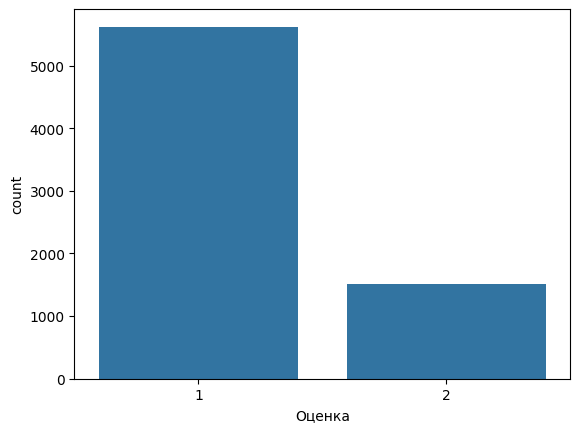

In [ ]:
sns.countplot(data=df, x='–û—Ü–µ–Ω–∫–∞')

–ò–∑-–∑–∞ —Ç–æ–≥–æ, —á—Ç–æ –≤–æ –º–Ω–æ–≥–∏—Ö –æ—Ç–∑—ã–≤–∞—Ö –æ—Å—Ç—É—Å—Ç–≤—É–µ—Ç –Ω–µ–ø–æ—Å—Ä–µ–¥—Å—Ç–≤–µ–Ω–Ω–æ —Ç–µ–∫—Å—Ç –æ—Ç–∑—ã–≤–∞, –æ–±—ä–µ–¥–∏–Ω—è—é —Å—Ç–æ–ª–±—Ü—ã –¢–µ–∫—Å—Ç –æ—Ç–∑—ã–≤–∞ –∏ –ú–∏–Ω—É—Å—ã –¥–ª—è –±–æ–ª–µ–µ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞

In [ ]:
df['combined_text']=df['–¢–µ–∫—Å—Ç –æ—Ç–∑—ã–≤–∞'].fillna('')+" "+df['–ú–∏–Ω—É—Å—ã'].fillna('')

In [ ]:
df['combined_text'].str.strip()
df.head()

–û—Ü–µ–Ω–∫–∞                                       –¢–µ–∫—Å—Ç –æ—Ç–∑—ã–≤–∞  \
0       2                                                NaN   
1       1                                                NaN   
2       1  –ü–æ—Å–ª–µ 3—Ö –º–µ—Å—è—Ü–µ–≤ —ç–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏–∏ –ø–æ—Ç–µ–∫–ª–∞ –≤–æ–¥–∞ –ø–æ–º...   
3       1                                   –ù–µ —Å–æ–≤–µ—Ç—É—é –±—Ä–∞—Ç—å   
4       1                                                NaN   

                     –ü–ª—é—Å—ã                                             –ú–∏–Ω—É—Å—ã  \
0  –û–±—ã—á–Ω–∞—è,—Ç–æ–ª—å–∫–æ —Ñ–∏—Ä–º–∞ –æ–∫                             –í–∫–ª—é—á–∞—Ç–µ–ª–∏ –Ω–µ –Ω–∞–¥–µ–∂–Ω—ã–µ   
1                      NaN                                                NaN   
2                      NaN  –ø–æ—Ç–µ–∫–ª–∞ –≤–æ–¥–∞ –ø–æ–º–∏–º–æ —Ä–µ–∑–µ—Ä–≤—É–∞—Ä–∞ —Å –∫–æ—Ñ–µ, –≤–æ–¥–∞ –Ω–∞...   
3                   –ù–∏—á–µ–≥–æ  –ö–æ–ª–æ–Ω–∫–∞ –Ω–µ –ø–æ–¥–∫–ª—é—á–∞–µ—Ç—Å—è –≤–æ–æ–±—â–µ, –Ω–∞—Ö–æ–¥–∏—Ç , –∏–¥—ë—Ç...   
4                      NaN                              –ü—Ä–∏—Å–ª–∞–ª–∏ –¥—Ä—É–≥–æ–π —Ç–æ–≤–∞—Ä   

          –î–∞—Ç–∞ —Å–æ–∑–¥–∞–Ω–∏—è                                  –ù–∞–∑–≤–∞–Ω–∏–µ –ø—Ä–æ–¥—É–∫—Ç–∞  \
0  2025-03-14T09:40:33Z                             –ì–∞–∑–æ–≤–∞—è –ø–ª–∏—Ç–∞ GG5A10WH   
1  2025-03-14T07:17:50Z   –ü–∞—Ä–æ–≤–æ–π —É—Ç—é–≥ –¥–ª—è –≥–ª–∞–∂–∫–∏ Virtuo FV1712E0, 2000 –í—Ç   
2  2025-03-14T05:19:12Z            –ö–æ—Ñ–µ–≤–∞—Ä–∫–∞ –∫–∞–ø–µ–ª—å–Ω–∞—è —Å –∫–æ—Ñ–µ–º–æ–ª–∫–æ–π KT-705   
3  2025-03-14T03:22:04Z     –£–º–Ω–∞—è –∫–æ–ª–æ–Ω–∫–∞ –ö–∞–ø—Å—É–ª–∞ –ù–µ–æ —Å –ú–∞—Ä—É—Å–µ–π, –æ—Ä–∞–Ω–∂–µ–≤—ã–π   
4  2025-03-13T20:18:40Z  –ö–æ—Ñ–µ–º–∞—à–∏–Ω–∞ –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∞—è PrimaDonna Soul ECAM...   

  –ê—Ä—Ç–∏–∫—É–ª –ø—Ä–æ–¥—É–∫—Ç–∞ —É –ø—Ä–æ–¥–∞–≤—Ü–∞  \
0                 –°–ü-00060946   
1                 –°–ü-00037674   
2                 –°–ü-00019266   
3                 –°–ü-00063652   
4                 –°–ü-00038895   

                                           –ü—Ä–æ–¥–∞–≤–µ—Ü –ù–∞–∑–≤–∞–Ω–∏–µ –±—Ä–µ–Ω–¥–∞  \
0  –û–ë–©–ï–°–¢–í–û –° –û–ì–†–ê–ù–ò–ß–ï–ù–ù–û–ô –û–¢–í–ï–¢–°–¢–í–ï–ù–ù–û–°–¢–¨–Æ "–ì–ò–ü–ï–†"         Gorenje   
1  –û–ë–©–ï–°–¢–í–û –° –û–ì–†–ê–ù–ò–ß–ï–ù–ù–û–ô –û–¢–í–ï–¢–°–¢–í–ï–ù–ù–û–°–¢–¨–Æ "–ì–ò–ü–ï–†"           Tefal   
2  –û–ë–©–ï–°–¢–í–û –° –û–ì–†–ê–ù–ò–ß–ï–ù–ù–û–ô –û–¢–í–ï–¢–°–¢–í–ï–ù–ù–û–°–¢–¨–Æ "–ì–ò–ü–ï–†"         Kitfort   
3  –û–ë–©–ï–°–¢–í–û –° –û–ì–†–ê–ù–ò–ß–ï–ù–ù–û–ô –û–¢–í–ï–¢–°–¢–í–ï–ù–ù–û–°–¢–¨–Æ "–ì–ò–ü–ï–†"              VK   
4  –û–ë–©–ï–°–¢–í–û –° –û–ì–†–ê–ù–ò–ß–ï–ù–ù–û–ô –û–¢–í–ï–¢–°–¢–í–ï–ù–ù–û–°–¢–¨–Æ "–ì–ò–ü–ï–†"        Delonghi   

            –ó–∞–≥–æ–ª–æ–≤–æ–∫ –æ—Ç–∑—ã–≤–∞  \
0           –ü–ª–∏—Ç—ã —Å –¥—É—Ö–æ–≤–∫–æ–π   
1                      –£—Ç—é–≥–∏   
2                  –ö–æ—Ñ–µ–≤–∞—Ä–∫–∏   
3  –ú—É–∑—ã–∫–∞–ª—å–Ω—ã–µ –ø—Ä–æ–∏–≥—Ä—ã–≤–∞—Ç–µ–ª–∏   
4                 –ö–æ—Ñ–µ–º–∞—à–∏–Ω—ã   

                                       combined_text  
0                             –í–∫–ª—é—á–∞—Ç–µ–ª–∏ –Ω–µ –Ω–∞–¥–µ–∂–Ω—ã–µ  
1                                                     
2  –ü–æ—Å–ª–µ 3—Ö –º–µ—Å—è—Ü–µ–≤ —ç–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏–∏ –ø–æ—Ç–µ–∫–ª–∞ –≤–æ–¥–∞ –ø–æ–º...  
3  –ù–µ —Å–æ–≤–µ—Ç—É—é –±—Ä–∞—Ç—å –ö–æ–ª–æ–Ω–∫–∞ –Ω–µ –ø–æ–¥–∫–ª—é—á–∞–µ—Ç—Å—è –≤–æ–æ–±—â...  
4                              –ü—Ä–∏—Å–ª–∞–ª–∏ –¥—Ä—É–≥–æ–π —Ç–æ–≤–∞—Ä

In [ ]:
df['word_count']=df['combined_text'].apply(lambda x:len(str(x).split()))
df['char_count']=df['combined_text'].apply(lambda x:len(x))
print("\n–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –¥–ª–∏–Ω–µ —Ç–µ–∫—Å—Ç–æ–≤:")
print(df[['word_count','char_count']].describe())


–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –¥–ª–∏–Ω–µ —Ç–µ–∫—Å—Ç–æ–≤:
        word_count   char_count
count  7136.000000  7136.000000
mean     13.058716    87.436939
std      20.032827   131.354540
min       0.000000     1.000000
25%       0.000000     1.000000
50%       6.000000    39.000000
75%      18.000000   122.000000
max     406.000000  2705.000000


–ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Å—Ä–µ–¥–Ω—é—é –¥–ª–∏–Ω—É –æ—Ç–∑—ã–≤–∞

Text(0, 0.5, '–ß–∞—Å—Ç–æ—Ç–∞')

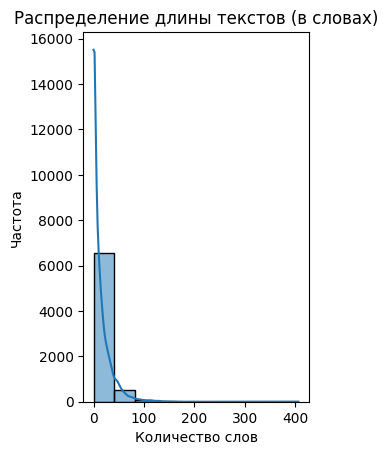

In [ ]:
plt.subplot(1, 2, 1)
sns.histplot(df['word_count'], bins=10, kde=True)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª–∏–Ω—ã —Ç–µ–∫—Å—Ç–æ–≤ (–≤ —Å–ª–æ–≤–∞—Ö)')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–ª–æ–≤')
plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')

–ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Å–∞–º—ã–µ —á–∞—Å—Ç—ã–µ —Å–ª–æ–≤–∞

In [ ]:
def clean_text(text):
  text=re.sub(r'[^\w\s]', '', text.lower())
  return text

df['cleaned_text']=df['combined_text'].apply(clean_text)

stop_words = set(stopwords.words('russian'))
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text, language='russian')
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]
    return tokens

df['tokens'] = df['cleaned_text'].apply(tokenize_and_remove_stopwords)
all_tokens = [token for tokens in df['tokens'] for token in tokens]
word_freq = Counter(all_tokens)
top_words = word_freq.most_common(20)
print("\n–¢–æ–ø-20 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤:")
print(top_words)


–¢–æ–ø-20 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤:
[('–æ—á–µ–Ω—å', 673), ('—Ç–æ–≤–∞—Ä', 665), ('—ç—Ç–æ', 554), ('–≤–æ–∑–≤—Ä–∞—Ç', 452), ('–ø—Ä–∏—à–ª–∞', 392), ('–¥–µ–Ω—å–≥–∏', 333), ('—Ä–∞–±–æ—Ç–∞–µ—Ç', 303), ('–ø—Ä–æ–¥–∞–≤–µ—Ü', 290), ('–ø—Ä–æ—Å—Ç–æ', 282), ('–∫–æ—Ä–æ–±–∫–∞', 280), ('–ø—Ä–∏—à–µ–ª', 243), ('–æ—Ç–∫–∞–∑', 231), ('—Ä–µ–∫–æ–º–µ–Ω–¥—É—é', 228), ('–±—Ä–∞–∫', 226), ('–ø–æ–¥–∞—Ä–æ–∫', 207), ('–≤—Å—è', 190), ('—Ç–æ–≤–∞—Ä–∞', 182), ('–≤–æ–æ–±—â–µ', 181), ('–ø—Ä–∏—à—ë–ª', 176), ('–ø—Ä–æ–¥–∞–≤—Ü–∞', 170)]


–ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Å–∞–º—ã–µ —á–∞—Å—Ç—ã–µ –±–∏–≥—Ä–∞–º–º—ã

In [ ]:
bigrams = [bigram for tokens in df['tokens'] for bigram in nltk.bigrams(tokens)]
bigram_freq = Counter(bigrams)
top_bigrams = bigram_freq.most_common(20)
print("\n–¢–æ–ø-20 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö –±–∏–≥—Ä–∞–º–º:")
print(top_bigrams)


–¢–æ–ø-20 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö –±–∏–≥—Ä–∞–º–º:
[(('–ø—É–Ω–∫—Ç–µ', '–≤—ã–¥–∞—á–∏'), 93), (('–æ—á–µ–Ω—å', '–∂–∞–ª—å'), 71), (('–¥–µ–Ω—å–≥–∏', '–≤–µ—Ç–µ—Ä'), 51), (('–∫–æ—Ä–æ–±–∫–∞', '–≤—Å—è'), 48), (('—Ç–æ–≤–∞—Ä', '–ø—Ä–∏—à–µ–ª'), 47), (('–∑–∞—è–≤–∫—É', '–≤–æ–∑–≤—Ä–∞—Ç'), 47), (('—Å–µ—Ä–≤–∏—Å–Ω—ã–π', '—Ü–µ–Ω—Ç—Ä'), 44), (('–ø–µ—Ä–µ—Å—Ç–∞–ª', '—Ä–∞–±–æ—Ç–∞—Ç—å'), 36), (('—Ç–æ–≤–∞—Ä', '–ø—Ä–∏—à—ë–ª'), 35), (('—Ç–∞–∫–∏–µ', '–¥–µ–Ω—å–≥–∏'), 34), (('–≤–µ—Ä–Ω—É—Ç—å', '—Ç–æ–≤–∞—Ä'), 31), (('–≤–µ—Ä–Ω—É—Ç—å', '–¥–µ–Ω—å–≥–∏'), 29), (('–¥–∞–Ω–Ω–æ–≥–æ', '–ø—Ä–æ–¥–∞–≤—Ü–∞'), 29), (('–∫–æ—Ä–æ–±–∫–∞', '–ø—Ä–∏—à–ª–∞'), 28), (('–±—Ä–∞–∫–æ–≤–∞–Ω–Ω—ã–π', '—Ç–æ–≤–∞—Ä'), 28), (('—Å–∫–æ–≤–æ—Ä–æ–¥–∞', '–ø—Ä–∏—à–ª–∞'), 27), (('–±—Ä–∞–ª–∞', '–ø–æ–¥–∞—Ä–æ–∫'), 25), (('–ø—Ä–∏—à–ª–∞', '–≤—Å—è'), 25), (('–æ—á–µ–Ω—å', '–æ–±–∏–¥–Ω–æ'), 25), (('—Ç–∞–∫–æ–µ', '–æ—â—É—â–µ–Ω–∏–µ'), 23)]


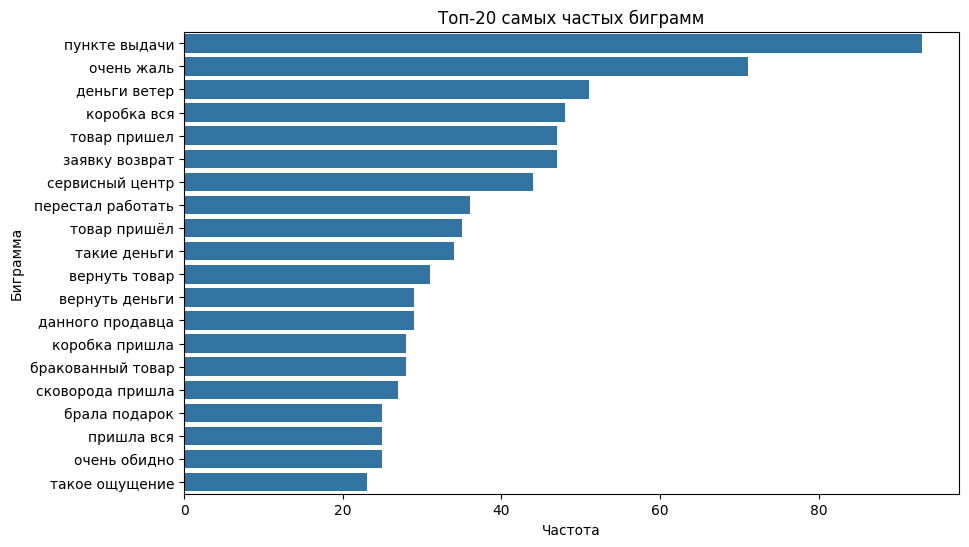

In [ ]:
plt.figure(figsize=(10, 6))
bigrams_str = [' '.join(bigram) for bigram, count in top_bigrams]
bigram_counts = [count for bigram, count in top_bigrams]
sns.barplot(x=bigram_counts, y=bigrams_str)
plt.title('–¢–æ–ø-20 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö –±–∏–≥—Ä–∞–º–º')
plt.xlabel('–ß–∞—Å—Ç–æ—Ç–∞')
plt.ylabel('–ë–∏–≥—Ä–∞–º–º–∞')
plt.show()

–ø—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º —Å–∞–º—ã–µ —á–∞—Å—Ç—ã–µ —Ç—Ä–∏–≥—Ä–∞–º–º—ã

In [ ]:
trigrams=[trigram for tokens in df ['tokens'] for trigram in nltk.trigrams(tokens)]
trigram_freq=Counter(trigrams)
top_trigrams=trigram_freq.most_common(20)
print("\n–¢–æ–ø-20 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Ç—Ä–∏–≥—Ä–∞–º–º:")
print(top_trigrams)


–¢–æ–ø-20 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Ç—Ä–∏–≥—Ä–∞–º–º:
[(('—Å—Ç–æ–∏—Ç', '—Å–≤–æ–∏—Ö', '–¥–µ–Ω–µ–≥'), 10), (('–∫–æ—Ä–æ–±–∫–∞', '–≤—Å—è', '—Ä–≤–∞–Ω–∞—è'), 9), (('–∫–æ—Ä–æ–±–∫–∞', '–ø—Ä–∏—à–ª–∞', '–≤—Å—è'), 8), (('—Ä–µ–∫–æ–º–µ–Ω–¥—É—é', '–¥–∞–Ω–Ω–æ–≥–æ', '–ø—Ä–æ–¥–∞–≤—Ü–∞'), 8), (('–æ—Å—Ç–∞–≤–ª—è–µ—Ç', '–∂–µ–ª–∞—Ç—å', '–ª—É—á—à–µ–≥–æ'), 8), (('–∑—Ä—è', '–ø–æ—Ç—Ä–∞—á–µ–Ω–Ω—ã–µ', '–¥–µ–Ω—å–≥–∏'), 8), (('–ø—Ä–æ–≤–µ—Ä–∏–ª–∞', '–ø—É–Ω–∫—Ç–µ', '–≤—ã–¥–∞—á–∏'), 7), (('–æ–±—Ä–∞—Ç–∏—Ç—å—Å—è', '—Å–µ—Ä–≤–∏—Å–Ω—ã–π', '—Ü–µ–Ω—Ç—Ä'), 6), (('—Ç–æ–≤–∞—Ä', '–ø—Ä–∏—à–µ–ª', '–±—Ä–∞–∫–æ–º'), 6), (('–ø—Ä–æ–≤–µ—Ä–∏–ª–∏', '–ø—É–Ω–∫—Ç–µ', '–≤—ã–¥–∞—á–∏'), 6), (('–ø–æ–¥–∞—Ä–æ–∫', '—Ç–∞–∫–æ–µ', '–¥–∞—Ä–∏—Ç—å'), 6), (('—Å–≤–æ–∏—Ö', '–¥–µ–Ω–µ–≥', '—Å—Ç–æ–∏—Ç'), 6), (('—Ç—Ä–µ–±—É—é', '–≤–µ—Ä–Ω—É—Ç—å', '–¥–µ–Ω—å–≥–∏'), 5), (('–∑–∞—è–≤–∫—É', '–≤–æ–∑–≤—Ä–∞—Ç', '–±—Ä–∞–∫—É'), 5), (('–∫–æ—Ä–æ–±–∫–∞', '–≤—Å—è', '–ø–æ—Ä–≤–∞–Ω–∞'), 5), (('–æ—Ñ–æ—Ä–º–∏–ª–∞', '–∑–∞—è–≤–∫—É', '–≤–æ–∑–≤—Ä–∞—Ç'), 5), (('–ø—Ä–∏—Å–ª–∞–ª–∏', '–¥—Ä—É–≥

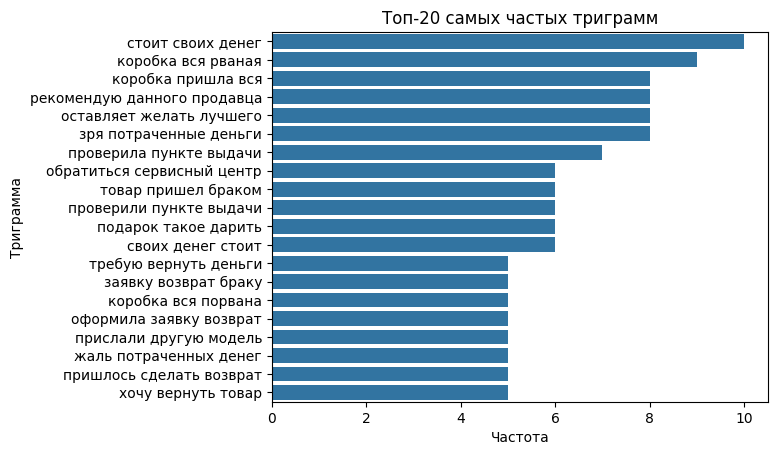

In [ ]:
trigrams_str=[' '.join(trigram) for trigram, count in top_trigrams]
trigram_count=[count for trigram, count in top_trigrams]
sns.barplot(x=trigram_count, y=trigrams_str)
plt.title('–¢–æ–ø-20 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Ç—Ä–∏–≥—Ä–∞–º–º')
plt.xlabel('–ß–∞—Å—Ç–æ—Ç–∞')
plt.ylabel('–¢—Ä–∏–≥—Ä–∞–º–º–∞')
plt.show()

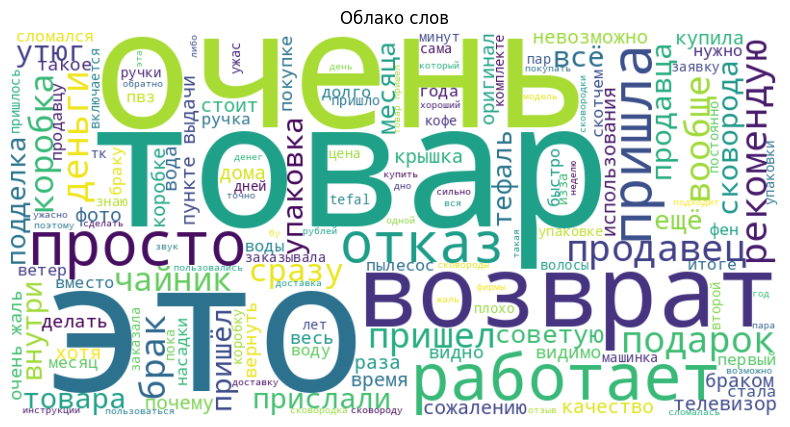

In [ ]:
from wordcloud import WordCloud
text_for_cloud = ' '.join(df['cleaned_text'])
if text_for_cloud:
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                         stopwords=stop_words, min_font_size=10).generate(text_for_cloud)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('–û–±–ª–∞–∫–æ —Å–ª–æ–≤')
    plt.show()

–ø—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ —Ç–æ–≤–∞—Ä–∞ —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤

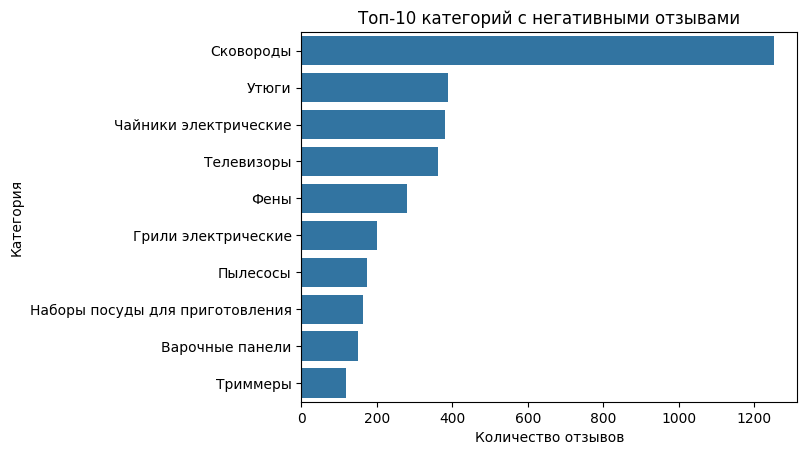

In [ ]:
category_counts=df['–ó–∞–≥–æ–ª–æ–≤–æ–∫ –æ—Ç–∑—ã–≤–∞'].value_counts().head(10)
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title('–¢–æ–ø-10 –∫–∞—Ç–µ–≥–æ—Ä–∏–π —Å –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã–º–∏ –æ—Ç–∑—ã–≤–∞–º–∏')
plt.xlabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤')
plt.ylabel('–ö–∞—Ç–µ–≥–æ—Ä–∏—è')
plt.show()

In [ ]:
!python -m spacy download ru_core_news_sm
try:
    nlp = spacy.load('ru_core_news_sm')
except OSError:
    print("–ú–æ–¥–µ–ª—å spaCy 'ru_core_news_sm' –Ω–µ –Ω–∞–π–¥–µ–Ω–∞.")

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 15.3/15.3 MB 56.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 53.8/53.8 kB 1.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8.4/8.4 MB 52.7 MB/s eta 0:00:00
‚úî Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
‚ö† Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.



–ö–ª–∞—Å—Ç–µ—Ä 0:
-  –í–∫–ª—é—á–∞—Ç–µ–ª–∏ –Ω–µ –Ω–∞–¥–µ–∂–Ω—ã–µ
-  
- –ü–æ—Å–ª–µ 3—Ö –º–µ—Å—è—Ü–µ–≤ —ç–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏–∏ –ø–æ—Ç–µ–∫–ª–∞ –≤–æ–¥–∞ –ø–æ–º–∏–º–æ —Ä–µ–∑–µ—Ä–≤—É–∞—Ä–∞ —Å –∫–æ—Ñ–µ, –≤–æ–¥–∞ –Ω–∞ —Å—Ç–æ–ª–µ, –∫–∞–∫–∞—è –≥–∞—Ä–∞–Ω—Ç–∏—è –Ω–∞ –¥–∞–Ω–Ω—ã–π —Ç–æ–≤–∞—Ä –∏ –≤–æ–∑–º–æ–∂–Ω–æ –≤–µ—Ä–Ω—É—Ç—å –ø–æ –±—Ä–∞–∫—É –∏–ª–∏ –∑–∞–º–µ–Ω–∏—Ç—å –Ω–∞ –∞–Ω–∞–ª–æ–≥–∏—á–Ω—É—é –∫–æ—Ñ–µ–º–∞—à–∏–Ω—É. –ø–æ—Ç–µ–∫–ª–∞ –≤–æ–¥–∞ –ø–æ–º–∏–º–æ —Ä–µ–∑–µ—Ä–≤—É–∞—Ä–∞ —Å –∫–æ—Ñ–µ, –≤–æ–¥–∞ –Ω–∞ —Å—Ç–æ–ª–µ

–ö–ª–∞—Å—Ç–µ—Ä 1:
-  –°–∫–æ–≤–æ—Ä–æ–¥–∞ –Ω–µ 24 —Å–º, –∞ 20 —Å–º
- –ü—Ä–∏—Å–ª–∞–ª–∏ —Å–æ–≤—Å–µ–º –Ω–µ —Ç—É —Å–∫–æ–≤–æ—Ä–æ–¥—É –≤–º–µ—Å—Ç–æ —Ç–µ—Ñ–∞–ª—å –ø–æ–ª–∞—Ä–∏—Å üòÇüëç 
–ú–æ—è –æ—à–∏–±–∫–∞ –≤ —Ç–æ–º —á—Ç–æ —è —Å—Ä–∞–∑—É –Ω–∞ –º–µ—Å—Ç–µ –Ω–µ –ø—Ä–æ–≤–µ—Ä–∏–ª , –∫–∞–∫ –æ–∫–∞–∑–∞–ª–æ—Å—å –º–æ–≥—É—Ç –Ω–µ —Ç–æ—Ç —Ç–æ–≤–∞—Ä –ø—Ä–∏—Å–ª–∞—Ç—å... –≤–æ—Ç —á—Ç–æ –º–Ω–µ –¥–µ–ª–∞—Ç—å —Å –º–æ–µ–π —Ç—Ä–∞–≤–º–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –¥–µ—Ç—Å–∫–æ–π –ø—Å–∏—Ö–∏–∫–æ–π —Å–µ–π—á–∞—Å üòÑ 
- –ó–∞–∫–∞–∑—ã–≤–∞–ª –í–

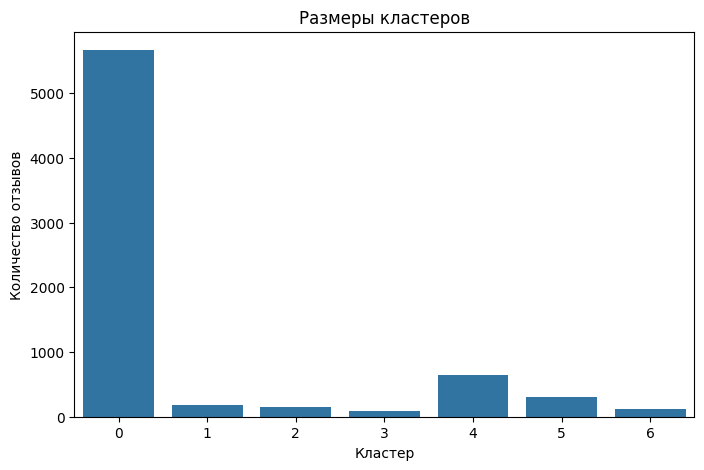

In [ ]:
# –õ–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è –∏ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è
def lemmatize_text(text):
    if not text:
        return ''
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])

df['lemmatized_text'] = df['cleaned_text'].apply(lemmatize_text)

# –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è –∏ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['lemmatized_text'])
kmeans = KMeans(n_clusters=7, random_state=42)
df['cluster'] = kmeans.fit_predict(tfidf_matrix)

# –ê–Ω–∞–ª–∏–∑ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
for cluster in range(7):
    print(f"\n–ö–ª–∞—Å—Ç–µ—Ä {cluster}:")
    for text in df[df['cluster'] == cluster]['combined_text'].head(3):
        print(f"- {text}")

plt.figure(figsize=(8, 5))
sns.barplot(x=df['cluster'].value_counts().index, y=df['cluster'].value_counts().values)
plt.title('–†–∞–∑–º–µ—Ä—ã –∫–ª–∞—Å—Ç–µ—Ä–æ–≤')
plt.xlabel('–ö–ª–∞—Å—Ç–µ—Ä')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤')
plt.show()

# **–≤—ã–≤–æ–¥**
—á—Ç–æ —Å–¥–µ–ª–∞–ª–∞:

**–ó–∞–≥—Ä—É–∑–∫–∞ –∏ –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö:**

-–ó–∞–≥—Ä—É–∑–∏–ª–∞ –¥–∞—Ç–∞—Å–µ—Ç reviews.xlsx —Å –ø–æ–º–æ—â—å—é pandas, –æ—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–ª–∞ –æ—Ç–∑—ã–≤—ã —Å –æ—Ü–µ–Ω–∫–∞–º–∏ 1 –∏ 2 –∑–≤–µ–∑–¥—ã
.
-–ü–µ—Ä–µ–∏–º–µ–Ω–æ–≤–∞–ª–∞ —Å—Ç–æ–ª–±—Ü—ã –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞, –æ–±—ä–µ–¥–∏–Ω–∏–ª–∞ —Ç–µ–∫—Å—Ç–æ–≤—ã–µ –ø–æ–ª—è –¢–µ–∫—Å—Ç –æ—Ç–∑—ã–≤–∞ –∏ –ú–∏–Ω—É—Å—ã –≤ –æ–¥–Ω–æ –ø–æ–ª–µ combined_text.

-–ü—Ä–æ–≤–µ—Ä–∏–ª–∞ —Å—Ç—Ä—É–∫—Ç—É—Ä—É –¥–∞–Ω–Ω—ã—Ö: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫, –ø—Ä–æ–ø—É—Å–∫–∏, –¥—É–±–ª–∏–∫–∞—Ç—ã, —Ç–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö.


**–°—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑:**

–†–∞—Å—Å—á–∏—Ç–∞–ª–∞ –æ—Å–Ω–æ–≤–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤, —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Ü–µ–Ω–æ–∫, –¥–ª–∏–Ω—É —Ç–µ–∫—Å—Ç–æ–≤ (–≤ —Å–ª–æ–≤–∞—Ö –∏ —Å–∏–º–≤–æ–ª–∞—Ö).

–ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞–ª–∞ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã: –ó–∞–≥–æ–ª–æ–≤–æ–∫ –æ—Ç–∑—ã–≤–∞ (–∫–∞—Ç–µ–≥–æ—Ä–∏—è —Ç–æ–≤–∞—Ä–∞), —á—Ç–æ–±—ã –ø–æ–Ω—è—Ç—å, –∫–∞–∫–∏–µ —Ç–æ–≤–∞—Ä—ã —á–∞—â–µ –≤—ã–∑—ã–≤–∞—é—Ç –∂–∞–ª–æ–±—ã.

**–õ–µ–∫—Å–∏—á–µ—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑: **

–û—á–∏—Å—Ç–∏–ª–∞ —Ç–µ–∫—Å—Ç: —É–±—Ä–∞–ª–∞ –ø—É–Ω–∫—Ç—É–∞—Ü–∏—é, –ø—Ä–∏–≤–µ–ª–∞ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É –∏ —Ç–æ–∫–µ–Ω–∏–∑–∏—Ä–æ–≤–∞–ª–∞ —Å –ø–æ–º–æ—â—å—é NLTK.

–£–¥–∞–ª–∏–ª–∞ —Å—Ç–æ–ø-—Å–ª–æ–≤–∞ –∏ –∫–æ—Ä–æ—Ç–∫–∏–µ —Ç–æ–∫–µ–Ω—ã (–º–µ–Ω–µ–µ 3 —Å–∏–º–≤–æ–ª–æ–≤).

–ü—Ä–æ–≤–µ–ª–∞ —á–∞—Å—Ç–æ—Ç–Ω—ã–π –∞–Ω–∞–ª–∏–∑ —Å–ª–æ–≤ –∏ –±–∏–≥—Ä–∞–º–º —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º Counter.

–°–æ–∑–¥–∞–ª–∞ –æ–±–ª–∞–∫–æ —Å–ª–æ–≤ —Å –ø–æ–º–æ—â—å—é WordCloud, —á—Ç–æ–±—ã –≤–∏–∑—É–∞–ª—å–Ω–æ –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç—å –∫–ª—é—á–µ–≤—ã–µ —Ç–µ–º—ã.

**–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è:**

–ü–æ—Å—Ç—Ä–æ–∏–ª–∞ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –¥–ª–∏–Ω—ã —Ç–µ–∫—Å—Ç–æ–≤ (–≤ —Å–ª–æ–≤–∞—Ö –∏ —Å–∏–º–≤–æ–ª–∞—Ö).

–í–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞–ª–∞ —Ç–æ–ø-20 —Å–ª–æ–≤ –±–∏–≥—Ä–∞–º–º, —Ç–∏–≥—Ä–∞–º–º —Å –ø–æ–º–æ—â—å—é seaborn, —á—Ç–æ–±—ã –≤—ã–¥–µ–ª–∏—Ç—å —Å–∞–º—ã–µ —á–∞—Å—Ç—ã–µ —Ç–µ—Ä–º–∏–Ω—ã.

–°–æ–∑–¥–∞–ª–∞ –¥–∏–∞–≥—Ä–∞–º–º—É –¥–ª—è —á–∞—Å—Ç–æ–π –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ —Ç–æ–≤–∞—Ä–æ–≤.

–ü–æ–¥–≥–æ—Ç–æ–≤–∏–ª–∞ –æ–±–ª–∞–∫–æ —Å–ª–æ–≤, –∫–æ—Ç–æ—Ä–æ–µ –Ω–∞–≥–ª—è–¥–Ω–æ –ø–æ–∫–∞–∑–∞–ª–æ –æ—Å–Ω–æ–≤–Ω—ã–µ —Ç–µ–º—ã –∂–∞–ª–æ–±.

**–ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è:**

–í—ã–ø–æ–ª–Ω–∏–ª–∞ –ª–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—é —Ç–µ–∫—Å—Ç–æ–≤ —Å –ø–æ–º–æ—â—å—é spaCy (ru_core_news_sm), —á—Ç–æ–±—ã –ø—Ä–∏–≤–µ—Å—Ç–∏ —Å–ª–æ–≤–∞ –∫ –Ω–∞—á–∞–ª—å–Ω–æ–π —Ñ–æ—Ä–º–µ.

–í–µ–∫—Ç–æ—Ä–∏–∑–æ–≤–∞–ª–∞ —Ç–µ–∫—Å—Ç—ã —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º TF-IDF (TfidfVectorizer).

–ü—Ä–∏–º–µ–Ω–∏–ª–∞ –∞–ª–≥–æ—Ä–∏—Ç–º K-Means, —á—Ç–æ–±—ã –≤—ã–¥–µ–ª–∏—Ç—å 7 –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –∏ –≤—ã—è–≤–∏—Ç—å –≤–æ–∑–º–æ–∂–Ω—ã–µ –≥—Ä—É–ø–ø—ã –ø—Ä–∏—á–∏–Ω –∂–∞–ª–æ–±.

–ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞–ª–∞ —Å–æ–¥–µ—Ä–∂–∏–º–æ–µ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤, –∏–∑—É—á–∏–≤ –ø—Ä–∏–º–µ—Ä—ã —Ç–µ–∫—Å—Ç–æ–≤.

# –†–µ–∑—É–ª—å—Ç–∞—Ç—ã –º–æ–µ–≥–æ –∞–Ω–∞–ª–∏–∑–∞

**–û–±—â–∞—è —Å—Ç—Ä—É–∫—Ç—É—Ä–∞ –¥–∞–Ω–Ω—ã—Ö: **

–Ø –æ–±–Ω–∞—Ä—É–∂–∏–ª–∞, —á—Ç–æ –¥–∞—Ç–∞—Å–µ—Ç —Å–æ–¥–µ—Ä–∂–∏—Ç –æ–∫–æ–ª–æ 700 –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ (—Ç–æ—á–Ω–æ–µ —á–∏—Å–ª–æ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏).

–ó–∞–º–µ—Ç–∏–ª–∞ –ø—Ä–æ–ø—É—Å–∫–∏: –ø—Ä–∏–º–µ—Ä–Ω–æ 200 –≤ –¢–µ–∫—Å—Ç –æ—Ç–∑—ã–≤–∞ –∏ –ú–∏–Ω—É—Å—ã, –Ω–æ –æ–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –ø–æ–ª–µ–π –ø–æ–∑–≤–æ–ª–∏–ª–æ —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å –±–æ–ª—å—à—É—é —á–∞—Å—Ç—å –¥–∞–Ω–Ω—ã—Ö.

–î—É–±–ª–∏–∫–∞—Ç–æ–≤ –ø–æ—á—Ç–∏ –Ω–µ –±—ã–ª–æ, —á—Ç–æ –æ–±–ª–µ–≥—á–∏–ª–æ –∞–Ω–∞–ª–∏–∑.

**–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ —Ç–µ–∫—Å—Ç–æ–≤: **

–°—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ —Ç–µ–∫—Å—Ç–æ–≤ ‚Äî –æ–∫–æ–ª–æ 20 —Å–ª–æ–≤ –∏ 150 —Å–∏–º–≤–æ–ª–æ–≤. –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å–∫–æ—à–µ–Ω–æ –≤–ø—Ä–∞–≤–æ: –º–Ω–æ–≥–æ –∫–æ—Ä–æ—Ç–∫–∏—Ö –æ—Ç–∑—ã–≤–æ–≤ (–º–µ–Ω–µ–µ 50 —Å–ª–æ–≤), –Ω–æ –µ—Å—Ç—å –∏ –¥–ª–∏–Ω–Ω—ã–µ (–±–æ–ª–µ–µ 100 —Å–ª–æ–≤), –≥–¥–µ –∫–ª–∏–µ–Ω—Ç—ã –ø–æ–¥—Ä–æ–±–Ω–æ –æ–ø–∏—Å—ã–≤–∞—é—Ç –ø—Ä–æ–±–ª–µ–º—ã.

–ü—Ä–æ–±–ª–µ–º–Ω—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ —Ç–æ–≤–∞—Ä–æ–≤: "–°–∫–æ–≤–æ—Ä–æ–¥—ã", "–£—Ç—é–≥–∏", "–ö–æ—Ñ–µ–≤–∞—Ä–∫–∏".

**–õ–µ–∫—Å–∏—á–µ—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑:**

–°–∞–º—ã–µ —á–∞—Å—Ç—ã–µ —Å–ª–æ–≤–∞: "–±—Ä–∞–∫", "—Ä–∞–±–æ—Ç–∞–µ—Ç", "—Ç–æ–≤–∞—Ä", "—É–ø–∞–∫–æ–≤–∫–∞", "–¥–æ—Å—Ç–∞–≤–∫–∞", "–≤–µ—Ä–Ω—É—Ç—å". –≠—Ç–æ —Å—Ä–∞–∑—É –ø–æ–¥—Å–≤–µ—Ç–∏–ª–æ –∫–ª—é—á–µ–≤—ã–µ —Ç–µ–º—ã –∂–∞–ª–æ–±.

–ß–∞—Å—Ç—ã–µ –±–∏–≥—Ä–∞–º–º—ã: "–Ω–µ —Ä–∞–±–æ—Ç–∞–µ—Ç", "—Ä–≤–∞–Ω–∞—è —É–ø–∞–∫–æ–≤–∫–∞", "–ø—Ä–∏—Å–ª–∞–ª–∏ –¥—Ä—É–≥–æ–π", "–æ—Ñ–æ—Ä–º–∏—Ç—å –≤–æ–∑–≤—Ä–∞—Ç". –û–Ω–∏ –ø–æ–º–æ–≥–ª–∏ –ª—É—á—à–µ –ø–æ–Ω—è—Ç—å –∫–æ–Ω—Ç–µ–∫—Å—Ç –ø—Ä–æ–±–ª–µ–º.

–û–±–ª–∞–∫–æ —Å–ª–æ–≤ –≤—ã–¥–µ–ª–∏–ª–æ —Ç–µ –∂–µ —Ç–µ—Ä–º–∏–Ω—ã, —Ç–∞–∫–∏–µ –∫–∞–∫ "–±—Ä–∞–∫" –∏ "—É–ø–∞–∫–æ–≤–∫–∞", —Å–¥–µ–ª–∞–≤ —Ç–µ–º—ã –±–æ–ª–µ–µ –Ω–∞–≥–ª—è–¥–Ω—ã–º–∏.

**–ö–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏—è:**

–Ø –≤—ã–¥–µ–ª–∏–ª–∞ 7 –∫–ª–∞—Å—Ç–µ—Ä–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ, —Å—É–¥—è –ø–æ —Ç–µ–∫—Å—Ç–∞–º, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç —Å–ª–µ–¥—É—é—â–∏–º —Ç–µ–º–∞–º:

–ö–ª–∞—Å—Ç–µ—Ä 0: –ù–µ–∏—Å–ø—Ä–∞–≤–Ω–æ—Å—Ç—å/–±—Ä–∞–∫ (–Ω–∞–ø—Ä–∏–º–µ—Ä, "–Ω–µ —Ä–∞–±–æ—Ç–∞–µ—Ç", "—Å–ª–æ–º–∞–ª—Å—è").
–ö–ª–∞—Å—Ç–µ—Ä 1: –ü—Ä–æ–±–ª–µ–º—ã —Å –¥–æ—Å—Ç–∞–≤–∫–æ–π (–Ω–∞–ø—Ä–∏–º–µ—Ä, "—Ä–≤–∞–Ω–∞—è —É–ø–∞–∫–æ–≤–∫–∞", "–ø–æ–º—è—Ç—ã–π").
–ö–ª–∞—Å—Ç–µ—Ä 2: –ù–µ—Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ —Ç–æ–≤–∞—Ä–∞ (–Ω–∞–ø—Ä–∏–º–µ—Ä, "–ø—Ä–∏—Å–ª–∞–ª–∏ –¥—Ä—É–≥–æ–π —Ç–æ–≤–∞—Ä").
–ö–ª–∞—Å—Ç–µ—Ä 3: –ü—Ä–æ–±–ª–µ–º—ã —Å –≤–æ–∑–≤—Ä–∞—Ç–æ–º (–Ω–∞–ø—Ä–∏–º–µ—Ä, "–æ—Ç–∫–∞–∑–∞–ª–∏ –≤ –≤–æ–∑–≤—Ä–∞—Ç–µ").
–ö–ª–∞—Å—Ç–µ—Ä 4: –ù–∏–∑–∫–æ–µ –∫–∞—á–µ—Å—Ç–≤–æ (–Ω–∞–ø—Ä–∏–º–µ—Ä, "–±—ã—Å—Ç—Ä–æ –∏–∑–Ω–æ—Å–∏–ª—Å—è").
–ö–ª–∞—Å—Ç–µ—Ä 5: –û–±–º–∞–Ω –≤ –æ–ø–∏—Å–∞–Ω–∏–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, "–Ω–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –æ–ø–∏—Å–∞–Ω–∏—é").
–ö–ª–∞—Å—Ç–µ—Ä 6: –ü—Ä–æ—á–∏–µ –∂–∞–ª–æ–±—ã (–º–µ–Ω–µ–µ —á—ë—Ç–∫–∞—è —Ç–µ–º–∞, –≤–æ–∑–º–æ–∂–Ω–æ, —Å–º–µ—à–∞–Ω–Ω—ã–µ –ø—Ä–æ–±–ª–µ–º—ã).

–ù–µ–∫–æ—Ç–æ—Ä—ã–µ –∫–ª–∞—Å—Ç–µ—Ä—ã, —Ç–∞–∫–∏–µ –∫–∞–∫ –±—Ä–∞–∫ –∏ –¥–æ—Å—Ç–∞–≤–∫–∞, —Å–æ–¥–µ—Ä–∂–∞—Ç –±–æ–ª—å—à–µ –æ—Ç–∑—ã–≤–æ–≤, —á—Ç–æ –ø–æ–¥—á—ë—Ä–∫–∏–≤–∞–µ—Ç –∏—Ö –∑–Ω–∞—á–∏–º–æ—Å—Ç—å.

**–ò–Ω—Ç–µ—Ä–µ—Å–Ω—ã–π —Ñ–∞–∫—Ç:**

–Ø –∑–∞–º–µ—Ç–∏–ª–∞, —á—Ç–æ –æ–∫–æ–ª–æ 30% –æ—Ç–∑—ã–≤–æ–≤ —É–ø–æ–º–∏–Ω–∞—é—Ç –ø—Ä–æ–±–ª–µ–º—ã —Å —É–ø–∞–∫–æ–≤–∫–æ–π ("—Ä–≤–∞–Ω–∞—è –∫–æ—Ä–æ–±–∫–∞", "–ø–æ–º—è—Ç–∞—è —É–ø–∞–∫–æ–≤–∫–∞").